In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
dataset_name = 'tea-seq'

### RNA

In [3]:
rna = sc.read_h5ad("/home/zqzhao/workplace/Multi_omics_unet/dataset/Matilda-data-TEAseq/train_rna.h5ad")
rna

AnnData object with n_obs × n_vars = 1262 × 9855
    obs: 'cell_type'

In [4]:
y = rna.obs['cell_type'].values
y

['Mono.CD14', 'B.Naive', 'T.CD4.Memory', 'T.CD4.Memory', 'T.CD4.Naive', ..., 'NK', 'T.CD4.Naive', 'NK', 'T.CD4.Memory', 'T.CD4.Naive']
Length: 1262
Categories (11, object): ['B.Activated', 'B.Naive', 'DC.Myeloid', 'Mono.CD14', ..., 'T.CD4.Memory', 'T.CD4.Naive', 'T.CD8.Effector', 'T.CD8.Naive']

### hidden

In [5]:
hidden = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_glb_vector.npy')
hidden.shape

(1262, 1280)

In [6]:
pred = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_target_pred.npy')

In [7]:
hidden = sc.AnnData(X=hidden)
sc.pp.neighbors(hidden, use_rep="X")
sc.tl.umap(hidden)

In [8]:
adata = rna.copy()
adata.obsm = hidden.obsm

In [9]:
import matplotlib.pyplot as plt

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


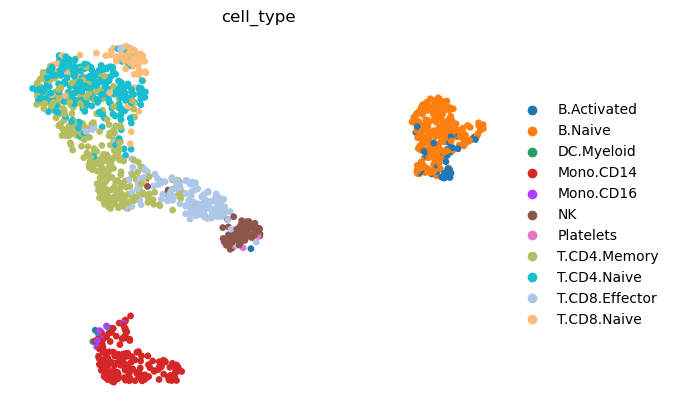

In [10]:
sc.pl.umap(adata, color=["cell_type"], ncols=1, frameon=False, show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_umap.svg', bbox_inches='tight')